# A manifold for surface grasping elongated objects

This notebook demonstrates how the pregrasp manifold for elongated objects works. To install the required libraries run:

```pip3 install transformations matplotlib numpy```

In [1]:
import transformations as tra
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
FIGURE_SIZE = (9, 9)

Uncomment this to plot in separate windows instead of the notebook. Requires pyqt5, install with `sudo apt-get install python3-pyqt5`.

In [3]:
# %matplotlib qt

In [4]:
# Plot a frame in a 3d axes
def plot_frame(ax, transformation, length, to_plot=[0, 1, 2]):
    colors = 'rgb'
    
    for i in to_plot:
        ax.quiver(transformation[0, 3], transformation[1, 3], transformation[2, 3], 
                  transformation[0, i], transformation[1, i], transformation[2, i], 
                  color=colors[i], length=length)

# Plot a vector in a 2d axes
def plot_vector(ax, base, direction):
    ax.quiver(base[0], base[1], direction[0], direction[1])

# Samples a position and orientation on the plane.
def sample_from_plane(stripe_width, stripe_height, stripe_offset):
    x, y = np.random.random(2) - 0.5
    x *= stripe_width
    y *= stripe_height
    y += np.sign(y) * stripe_offset
    
    phi = -np.sign(y) * np.pi / 2
    
    return np.array([x, y]), phi

# Convert position and orientation on the plane into a 3d frame
def from_xy_plane_to_3d(target_frame, position, orientation):
    sampled_position = target_frame.dot([position[0], position[1], 0, 1])
    
    sampled_frame = target_frame.copy()
    sampled_frame[0:3, 3] = sampled_position[:3]
    sampled_frame = sampled_frame.dot(tra.rotation_matrix(angle=orientation, direction=[0, 0, 1]))
    return sampled_frame

The manifold for elongated objects consists of two stripes and has three parameters: stripe width, stripe height and stripe offset. Here is a visualization:

![](elongated-manifold-parameters.png)

The width dimension of the stripe is aligned with the initial frame X axis. Here is a demonstration of sampling on a plane:

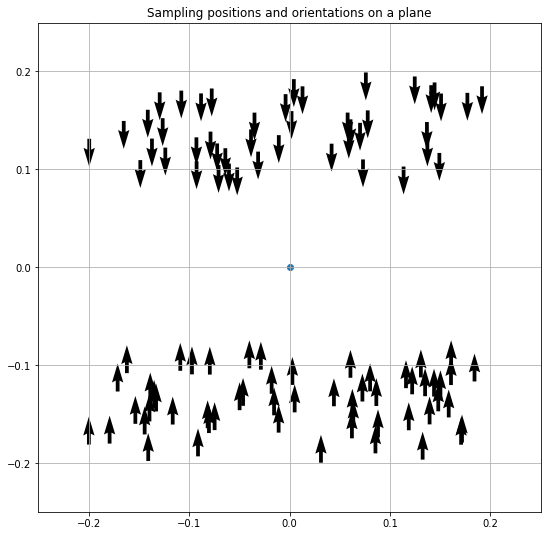

In [5]:
size_x = 0.5
size_y = 0.5

stripe_width = 0.4
stripe_height = 0.2
stripe_offset = 0.1

fig = plt.figure(figsize=FIGURE_SIZE)
ax = fig.add_subplot(111)
ax.set_xlim(-size_x/2, size_x/2)
ax.set_ylim(-size_y/2, size_y/2)

for i in range(100):
    position, phi = sample_from_plane(stripe_width, stripe_height, stripe_offset)
    plot_vector(ax, position, [np.cos(phi), np.sin(phi)])
plt.scatter(0, 0)
plt.grid(True)
plt.title('Sampling positions and orientations on a plane');

This demonstrates how the sampled frames look in 3d. The initial pregrasp frame is drawn in a larger size and with all three axes. The sampled frames are drawn in a smaller size and only with X and Z axes.

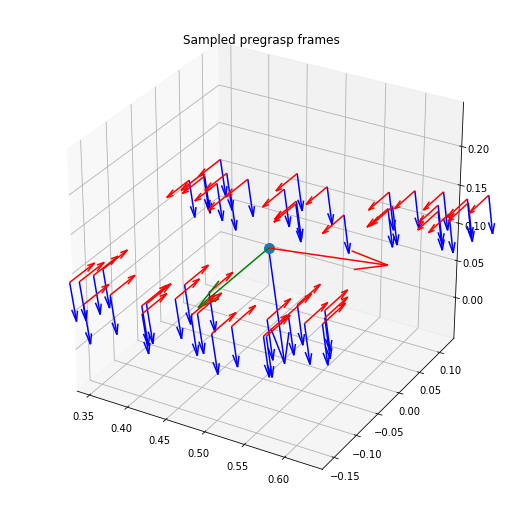

In [6]:
center_frame = tra.translation_matrix([0.49, -0.02, 0.1]).dot(
    tra.quaternion_matrix([0, 0.9976, 0, 0.0699]))

stripe_width = 0.4
stripe_height = 0.2
stripe_offset = 0.1

center_frame_arrow_length = 0.15
sampled_frame_arrow_length = 0.05
scene_size = 0.3
samples = 50

fig2 = plt.figure(figsize=FIGURE_SIZE)
ax3d = fig2.add_subplot(111, projection='3d')
ax3d.set_xlim(center_frame[0, 3] - scene_size / 2, center_frame[0, 3] + scene_size / 2)
ax3d.set_ylim(center_frame[1, 3] - scene_size / 2, center_frame[1, 3] + scene_size / 2)
ax3d.set_zlim(center_frame[2, 3] - scene_size / 2, center_frame[2, 3] + scene_size / 2)

plot_frame(ax3d, center_frame, center_frame_arrow_length, to_plot=[0, 1, 2])

for i in range(samples):
    plane_position, phi = sample_from_plane(stripe_width, stripe_height, stripe_offset)
    sampled_frame = from_xy_plane_to_3d(center_frame, plane_position, phi)
    plot_frame(ax3d, sampled_frame, sampled_frame_arrow_length, to_plot=[0, 2])
ax3d.scatter(center_frame[0, 3], center_frame[1, 3], center_frame[2, 3], s=100)
    
plt.title('Sampled pregrasp frames');